# Variables aleatorias multivariadas

Empecemos con el caso bivariado con un **vector** aleatorio continuo $(X_1, X_2)$ con valores en $(x_1, x_2) \in \mathcal{X}_1 \times \mathcal{X}_2$, ambos subintervalos de $\mathbb{R}$. Una función no negativa $f(x_1, x_2)$ es una *función de distribución conjunto* de $\mathbf{X} = (X_1, X_2)$ si 
$$
\int_{\mathcal{X}_2} \int_{\mathcal{X}_1} f(x_1, x_2)dx_1 dx_2 = 1
$$

## Distribuciones marginales

La distribución marginal de $X_i$ se obtiene integrando respecto a la otra variable, en este caso
$$
f_i(x_i) = \int_{\mathcal{X}_j} f(x_1, x_2)dx_j
$$
para $i \neq j$ con $x_i$ fijo.

## Interpretación en el caso discreto

En el caso de vectores aleatorios discretos, $f(x_1, x_2)$ representa 

$$
f(x_1, x_2) = \mathbb{P}(X_1 = x_2 \cap X_2 = x_2).
$$

## Funciones de densidad condicionales
Supongamos que para $x_2 \in \mathcal{X}_2$, $f_2(x_2) > 0$, entonces es posible definir la función de densidad condicional de $X_1$ dado $X_2$, como
$$
f_{1|2}(x_1) = \dfrac{f(x_1, x_2)}{f_2(x_2)}
$$

Observe que la función condicional $f_{1|2}$ está en función de $x_1$, el valor de $x_2$ se considera fijo.

## Esperanza y varianza condicional
Utilizando la función de densidad condicional $f_{i|j}$ podemos definir la esperanza y la varianza condicional como

$$
E\left[ X_i | X_j = x_j \right] = \mu_{i|j} = \int_{X_i} f_{i|j}(x_i)dx_i
$$

$$
Var\left[X_i | X_j = x_j \right] = \sigma_{i|j}^2 = E\left[ X_{i}^2 | X_j = x_j \right] - \mu_{i|j}^2
$$

De manera general, tenemos

$$
E\left[ g(X_1, X_2) \right] = \int_{\mathcal{X}_2} \int_{\mathcal{X}_1} g(x_1, x_2) f(x_1, x_2) dx_1 dx_2
$$
$$
E\left[ h(X_i) | X_j = x_j \right] = \int_{\mathcal{X}_i}h(x_i) f_{i|j} dx_i
$$

Es interesante observar que la esperanza condicional, es una función de la variable (o variables) sobre la que se está condicionando.

Para calcular la probabilidad de un evento $A \subseteq \mathbb{R}^2$, se utiliza la ecuación 

$$
\mathbb{P}(A) = \int \int \mathbb{1}_{A} f(x_1, x_2)dx_1 dx_2.
$$

De manera similar, si queremos evaluar la probabilidad de un evento $B \subseteq \mathbb{R}$ definido únicamente a través de $X_i$ dado que $X_j = x_j$ integramos de la siguiente forma

$$
\mathbb{P}(B | X_j = x_j) = \int_{B \cap \mathcal{X_i}} f_{i|j}(x_i)dx_i
$$

**Teorema**

Suponga que $\mathbf{X} = (X_1, X_2)$ tiene función de densidad $f(x_1, x_2)$. Si $E_1[]$ y $V_1[]$ denotan la esperanza y la varianza de $X_1$, entonces

$E[X_2] = E_1 \left[ E_{2|1} \left( X_2 | X_1 \right) \right]$

$V(X_2) = V_{1} \left[ E_{2|1}\left( X_2 | X_1 \right) \right] + E_{1} \left[ V_{2|1} \left( X_2 | X_1 \right) \right]$

**Ejercicio**

Si $X_i$ son variables aleatorias independiente e indénticamente distribuidas y $N$ es una variable aleatoria con valores en $\{0, 1,\ldots \}$ independiente de las $X_i$s, encuentre $E[S]$ y $Var[S]$, en donde $S = \sum_{i=1}^{N} X_i$

**Ejercicio**

Si 
$$
f(x_1, x_2)=
\begin{cases}
  6(1- x_2) & \text{Si} & 0 < x_1 < x_2 <1 \\
  0 & \text{En otro caso} & 
\end{cases}
$$

obtenga $f_{1|2}\left(x_1| x_2 = \dfrac{1}{2} \right)$ y compruebe que:

$E\left[X_1 | X_2 = \dfrac{1}{2}\right] = \dfrac{1}{4} = 0.25$.

$Var\left[X_1 | X_2 = \dfrac{1}{2}\right] = \dfrac{1}{48} = 0.021$


In [1]:
import numpy as np
np.random.seed(54321)

#f_{1|2}(x_1) = 1 / x_2 para x_2 fijo 0 < x_2 < 1
#Para poder simular necesitamos obtener la función de distribución F_{1|2}(x) = x / x_2,
#con 0 < x_2 < 1 fijo.
#Finalmente encontrar la función inversa x = u * x_2 con u en (0,1) (transformada inversa)

def distribucion_inversa(u, x_2 = 0.5):
    '''
    Función inversa de la función F_{1|2} 
    
    ENTRADA
    u: Float en (0, 1) o np.array con números en (0, 1)
    
    x_2: Float en (0, 1)
    
    SALIDA
    float o np.array de floats
    '''
    return x_2 * u

def simula_aleatorio(x_2 = 0.5, n_sim = int(1e4)):
    '''
    Función para simular un números aleatorios de la densidad f_{1|2}
    
    ENTRADA
    n_sim: Entero positivo que representa la cantidad de números aleatorios para simular
    
    x_2: Float en (0, 1)
    
    SALIDA
    float o np.array de floats
    '''
    
    #Genera uniforme (0,1)
    u = np.random.uniform(low = 0, high = 1, size = n_sim)
    
    return distribucion_inversa(u, x_2)
    

In [2]:
aleatorios = simula_aleatorio(x_2 = 0.5, n_sim = int(1e4))
media = np.mean(aleatorios)
segundo_momento = np.mean(aleatorios**2)
varianza = segundo_momento - media**2
print("La media es", round(media, 3))
print("La varianza es", round(varianza, 3))


La media es 0.249
La varianza es 0.021


**Ejercicio**

Supongamos que, condicionada a $X_1 = x_1$, la variable $X_2$ tiene distribución $N(\beta_0 + \beta_1 x_1, \sigma^2 = x_{1}^2)$ para cualquier $x_1 \in \mathbb{R}$. Los números $\beta_0, \beta_1$ son números reales fijos. Supongamos además, que $X_1$ tiene distribución $N(3, \sigma^2 = 10)$. Calcule $E[X_2]$ y $Var[X_2]$, de forma analítica.

$$
\beta_0 = 1, \beta_1 = 3.
$$

**Extensión a más dimensiones**

Es inmediato extender la funciones de densidad condicionales para el caso multivariado, por ejemplo para $\mathbf{X} = \left(X_1, X_2, X_3, X_4 \right)$ se tiene que

$$
\int_{\mathcal{X}_4} \int_{\mathcal{X}_3}\int_{\mathcal{X}_2} \int_{\mathcal{X}_1} f(x_1, x_2, x_3, x_4)\Pi_{i=1}^4 = 1
$$

$$
f_{1,3}(x_1, x_3) = \int_{\mathcal{X}_4} \int_{\mathcal{X}_2} f(x_1, x_2, x_3, x_4) dx_2 dx_4.
$$

$$
f_{2,4|1,3}(x_2, x_4) = \dfrac{ f(x_1, x_2, x_3, x_4) }{ f_{1,3}(x_1, x_3) }.
$$

**Ejercicio (Distribuciones discretas)**

Supongamos que se tira una moneda, $U$, dos veces y que con probabilidad $p$ cae águila ($U = 1$) y con probabilidad $1 - p$ cae sol ($U = 0$).

Sean $X_1 = U_1 + U_2$ y $X_2 = U_1 - U_2$, para $p \in \{0.01, 0.02, \ldots, 0.99\}$, calcule la probabilidad conjunta de que $(X_1 = 1, X_2 = -1)$.

Encuentre la probabilidad que maximiza el evento.

Resuelva el problema de forma analítica y utilizando simulación, además grafique sus resultados.


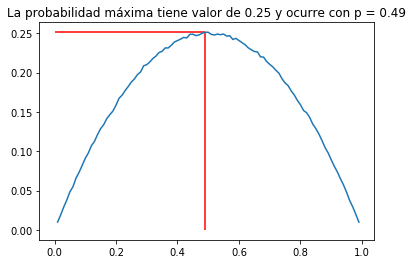

In [4]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(54321)

#número de simulaciones
n_sim = int(1e5)

#valores de p
p = np.linspace(0.01, 0.99, 99)

#Para almacenar las probabilidades del evento (1, -1)
prob = []

for i in range(len(p)):
        
    #simula tiros de la moneda
    tiros = np.random.choice([1, 0], size = (n_sim, 2), replace = True, p = (p[i], 1 - p[i]))
    
    #Revisa condición (-1, 1) y cuenta éxitos
    exitos = np.sum(np.logical_and(tiros[:, 0] + tiros[:, 1] == 1, tiros[:, 0] - tiros[:, 1] == -1))
    
    #Calcula probabilidad
    prob.append(float(exitos) / n_sim)

#Encuentra la probabilidad que maximiza el evento
prob_max = p[np.argmax(prob)]

#Grafica
plt.plot(p, prob, '-')
plt.vlines(x = prob_max, ymin = 0, ymax = prob[np.argmax(prob)], color = "red")
plt.hlines(y = prob[np.argmax(prob)], xmin = 0, xmax = prob_max, color = "red")
plt.title('La probabilidad máxima tiene valor de ' + str(round(prob[np.argmax(prob)],2)) + ' y ocurre con p = '
          + str(round(prob_max, 2)))
plt.show()

## Distribución multinomial

Una variable aleatoria discreta $\mathbf{X} = \left(X_1, \ldots, X_k \right)$ se dice que tiene distribución multinomial con parámetros $n$ y $p_1, \ldots, p_k$ si la función de distribución conjunta $\mathbb{P}(X_1 = x_1, \ldots, X_k = x_k)$ está dada por:

$$
f(\mathbf{x}) = \dfrac{n!}{ \Pi_{i=1}^{k} (x_i!)} \Pi_{i=1}^{k}p_{i}^{x_i}
$$

**Teorema**

En una distribución multinomial $\mathbf{X} = \left(X_1, \ldots, X_k \right)$, la distribución marginal de $X_i$ es $Bin(n, p_i)$

**Ejercicio**

Suponga que se tira un dado (justo) $20$ veces y defina $X_i$ como el número de veces que que el dado cae mostrando la cara con $i$ puntos, $i=1,2,\ldots,6$. Utilizando simulación calcule la probabilidad del evento 

$$
\{X_1 = 5, X_2 = 5, X_3 = 5, X_4 = 3, X_5 = 1, X_6 = 1 \}.
$$ 

Valide su resultado utilizando la distribución multinomial.

## Covarianzas y coeficiente de correlación

**Definición(Covarianza)**

La covarianza entre dos variables aleatorias $X_1$ y $X_2$, está dada por:

$$
Cov(X_1, X_2)  =  E\left[ \left( X_1 - \mu_1 \right) \left( X_2 - \mu_2 \right) \right].
$$
lo cual también se expresa como:

$$
Cov(X_1, X_2) = E[X_1 X_2] - \mu_1 \mu_2.
$$

**Definición(Coeficiente de correlación)**

El coeficiente de correlación (lineal) entre dos variables $X_1$ y $X_2$, se define como:

$$
\rho(X_1, X_2) = \dfrac{Cov(X_1, X_2)}{\sigma_1 \sigma_2}.
$$

**Proppiedades de la covarianza y el coeficiente de correlación**

* Si $c$ es una constante, $Cov(X_1, c) = 0$.

* $Cov(X_1 + X_2, Y_1 + Y_2) = Cov(X_1, Y_1) + Cov(X_1, Y_2) + Cov(X_2, Y_1) + Cov(X_2, Y_2)$.

* $Cov(\sum_{i=1}^{k} a_{i} X_{i}), \sum_{j=1}^{k} b{i} X_{j}) = \sum_{i} \sum_{j} a_i b_j Cov(X_i, X_j)$.

* $Cov(X_1, X_1) = Var(X_1)$.

* $Var(\sum_{i=1}^{k} a_{i} X_{i}) = \sum_{i=1}^{k}a_{i}^{2}Var(X_i) + 2 \sum_{i \neq j} a_{i}a_{j} Cov(X_i, X_j)$.

* Sea $Y_i = c_i + d_i X_i$ con $c_i, d_i$ constantes, $i=1,2$. Entonces $\rho(Y_1,Y_2) = \rho(X_1, X_2)$.

* $|\rho(X_1, X_2)| \leq 1$. Con igualdad si y sólos si $X_1$ y $X_2$ están relacionadas de manera lineal, es decir si $X_1 = a + bX_2$ para ciertas constantes $a,b$.

## Variables aleatorias independientes

**Definición(Independencia de variables aleatorias)**

Decimos que $X_1,\ldots,X_k$ forma una colección de variables aleatorias independientes si y sólo si

$$
f(x_1, \ldots, x_k) = \Pi_{i=1}^{k} f_{i}(x_i).
$$

para todo $x_i \in \mathcal{X}_i.$

In [5]:
?np.random.choice